# Estudo dados isolamento SP - IPT

Este notebook avalia os dados sobre o isolamento no estado de São Paulo extraídos do [portal do governo estadual](https://www.saopaulo.sp.gov.br/coronavirus/isolamento/).



# Como usar este notebook

Este notebook foi implementado usando o Google Colab com o intuito de minimizar a necessidade de dependências que precisariam ser instaladas para rodar localmente.

Para ter acesso aos dados na execução deste notebook, você pode montar o acesso ao seu Google Drive ou apenas carregar os dados na seção. Detalhes de como fazer isso podem ser encontrados neste [link](https://neptune.ai/blog/google-colab-dealing-with-files).

# Bibliotecas usadas e montando o Google Drive

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from google.colab import drive

In [3]:
drive.mount('/gdrive',force_remount=True)

# Essa informação deve mudar para cada um que executar este notebook
BASE_PATH = '/gdrive/MyDrive/Classroom/IA368X/CX002 IA368'
print(f'Base path: {BASE_PATH}')

Mounted at /gdrive
Base path: /gdrive/MyDrive/Classroom/IA368X/CX002 IA368


# Carregamento dos dados para um [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)



In [4]:
# Data filepath
DATA_FILENAME = 'IPT.csv'

# Read CSV and display it's head
df = pd.read_csv(f'{BASE_PATH}/{DATA_FILENAME}',sep=',',index_col=0)
df.head()

,Código Município IBGE,População estimada (2020),UF1,26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,06/03/2020,07/03/2020,08/03/2020,09/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,17/03/2020,18/03/2020,19/03/2020,20/03/2020,21/03/2020,22/03/2020,23/03/2020,24/03/2020,25/03/2020,26/03/2020,27/03/2020,28/03/2020,29/03/2020,30/03/2020,31/03/2020,01/04/2020,02/04/2020,03/04/2020,04/04/2020,05/04/2020,...,14/03/2021,15/03/2021,16/03/2021,17/03/2021,18/03/2021,19/03/2021,20/03/2021,21/03/2021,22/03/2021,23/03/2021,24/03/2021,25/03/2021,26/03/2021,27/03/2021,28/03/2021,29/03/2021,30/03/2021,31/03/2021,01/04/2021,02/04/2021,03/04/2021,04/04/2021,05/04/2021,06/04/2021,07/04/2021,08/04/2021,09/04/2021,10/04/2021,11/04/2021,12/04/2021,13/04/2021,14/04/2021,15/04/2021,16/04/2021,17/04/2021,18/04/2021,19/04/2021,20/04/2021,21/04/2021,22/04/2021
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AMERICANA,3501608,242018,SP,36%,34%,34%,35%,37%,34%,33%,33%,33%,32%,35%,37%,34%,34%,34%,31%,34%,39%,41%,42%,43%,57%,56%,51%,53%,54%,54%,52%,56%,59%,54%,54%,54%,53%,53%,58%,58%,...,48%,40%,41%,38%,40%,39%,44%,50%,39%,41%,38%,38%,39%,44%,47%,41%,40%,39%,38%,45%,44%,49%,40%,40%,40%,39%,38%,42%,48%,39%,40%,38%,38%,39%,42%,48%,38%,39%,44%,37%
AMPARO,3501905,72677,SP,33%,33%,33%,35%,36%,36%,36%,36%,36%,34%,36%,37%,35%,35%,32%,38%,40%,45%,46%,47%,48%,62%,58%,55%,55%,55%,54%,55%,56%,60%,54%,57%,57%,56%,56%,59%,61%,...,48%,41%,42%,40%,41%,41%,43%,48%,39%,42%,41%,40%,41%,43%,51%,42%,40%,41%,41%,42%,42%,47%,41%,38%,40%,40%,37%,42%,45%,38%,36%,37%,39%,39%,40%,46%,37%,40%,45%,36%
ANDRADINA,3502101,57202,SP,37%,36%,36%,36%,37%,39%,38%,38%,38%,37%,37%,38%,38%,38%,34%,38%,38%,43%,42%,44%,44%,50%,50%,49%,49%,50%,49%,50%,50%,53%,52%,50%,48%,47%,46%,47%,48%,...,47%,40%,41%,42%,42%,41%,45%,48%,37%,42%,41%,43%,42%,44%,50%,43%,43%,42%,40%,42%,46%,47%,41%,39%,41%,41%,42%,44%,47%,42%,44%,43%,42%,43%,41%,50%,42%,44%,49%,44%
ARAÇATUBA,3502804,198129,SP,32%,NaN,NaN,NaN,33%,31%,31%,30%,NaN,NaN,31%,33%,30%,30%,NaN,29%,31%,36%,37%,38%,39%,51%,51%,47%,49%,48%,48%,45%,48%,52%,48%,48%,48%,48%,47%,51%,52%,...,46%,37%,40%,38%,41%,38%,44%,47%,38%,41%,38%,38%,39%,40%,46%,36%,36%,36%,38%,42%,40%,44%,38%,37%,39%,36%,35%,38%,43%,35%,39%,36%,38%,38%,40%,43%,36%,38%,44%,35%
ARARAQUARA,3503208,238339,SP,NaN,NaN,NaN,NaN,33%,NaN,NaN,NaN,NaN,NaN,NaN,32%,NaN,NaN,NaN,28%,30%,35%,37%,38%,38%,49%,51%,47%,49%,51%,50%,48%,50%,54%,51%,51%,50%,49%,49%,52%,53%,...,48%,38%,40%,39%,40%,38%,42%,47%,38%,39%,37%,38%,38%,39%,47%,38%,37%,41%,42%,44%,43%,46%,37%,37%,38%,37%,36%,40%,46%,37%,39%,37%,37%,36%,40%,47%,37%,37%,44%,37%


# Tratamentos sobre o dataset - Análise e Tratamento de Dados Faltantes

Nesta seção serão analisados dados faltantes, procedimentos de transformações e limpezas.

In [5]:
print(f'Existing colums are: {df.columns.values}')

Existing colums are: ['Código Município IBGE' 'População estimada (2020)' 'UF1' '26/02/2020'
 '27/02/2020' '28/02/2020' '29/02/2020' '01/03/2020' '02/03/2020'
 '03/03/2020' '04/03/2020' '05/03/2020' '06/03/2020' '07/03/2020'
 '08/03/2020' '09/03/2020' '10/03/2020' '11/03/2020' '12/03/2020'
 '13/03/2020' '17/03/2020' '18/03/2020' '19/03/2020' '20/03/2020'
 '21/03/2020' '22/03/2020' '23/03/2020' '24/03/2020' '25/03/2020'
 '26/03/2020' '27/03/2020' '28/03/2020' '29/03/2020' '30/03/2020'
 '31/03/2020' '01/04/2020' '02/04/2020' '03/04/2020' '04/04/2020'
 '05/04/2020' '06/04/2020' '07/04/2020' '08/04/2020' '09/04/2020'
 '10/04/2020' '11/04/2020' '12/04/2020' '13/04/2020' '14/04/2020'
 '15/04/2020' '16/04/2020' '17/04/2020' '18/04/2020' '19/04/2020'
 '20/04/2020' '21/04/2020' '22/04/2020' '23/04/2020' '24/04/2020'
 '25/04/2020' '26/04/2020' '27/04/2020' '28/04/2020' '29/04/2020'
 '30/04/2020' '01/05/2020' '02/05/2020' '03/05/2020' '04/05/2020'
 '05/05/2020' '06/05/2020' '07/05/2020' '08/05/20

In [6]:
population = df['População estimada (2020)'].copy()

In [7]:
# Removing unwanted columns
df.drop(columns=['Código Município IBGE', 'População estimada (2020)', 'UF1'],
        inplace=True)

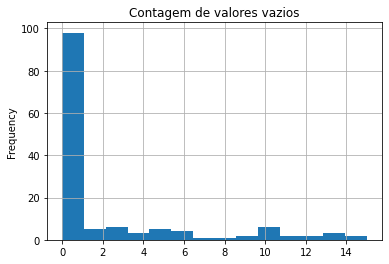

In [8]:
# Check the amount of null samples for each city
null_count = df.isnull().sum(axis=1)
null_count.plot(kind='hist',bins=14,title='Contagem de valores vazios', grid=True)

In [9]:
# The maximum amount of days with missing data is 15 out of 419
null_count.sort_values(ascending=False).head(50)

Município
ESTADO DE SÃO PAULO      15
JANDIRA                  14
PRESIDENTE PRUDENTE      13
ARARAQUARA               13
LIMEIRA                  13
POÁ                      12
GUARULHOS                12
CARAPICUÍBA              11
CAIEIRAS                 11
OSASCO                   10
DIADEMA                  10
ITAPEVI                  10
FERNANDÓPOLIS            10
JUNDIAÍ                  10
BARUERI                  10
MARÍLIA                   9
BAURU                     9
CUBATÃO                   8
FRANCO DA ROCHA           7
MAUÁ                      6
ARAÇATUBA                 6
PIRACICABA                6
OURINHOS                  6
SÃO CAETANO DO SUL        5
BRAGANÇA PAULISTA         5
BOTUCATU                  5
VÁRZEA PAULISTA           5
SOROCABA                  5
SUMARÉ                    4
SUZANO                    4
ITATIBA                   4
CATANDUVA                 3
BARRETOS                  3
ITAPECERICA DA SERRA      3
ITAPEVA                   3
JACAREÍ   

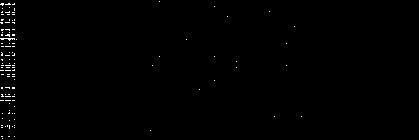

In [10]:
# Evaluate where missing data happens in the time series
# (only for samples with more tha one missing value)
more_than_one_missing_sample = df.isnull()
missing_time_series = more_than_one_missing_sample.values

Image.fromarray(missing_time_series)

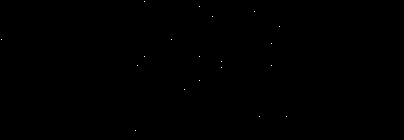

In [11]:
# Remove first 15 days
Image.fromarray(missing_time_series[:,15:])

In [12]:
df_t = df.transpose()
df_t.head()

Município,AMERICANA,AMPARO,ANDRADINA,ARAÇATUBA,ARARAQUARA,ARARAS,ARTUR NOGUEIRA,ARUJÁ,ASSIS,ATIBAIA,AVARÉ,BARRETOS,BARUERI,BATATAIS,BAURU,BEBEDOURO,BERTIOGA,BIRIGUI,BOITUVA,BOTUCATU,BRAGANÇA PAULISTA,CAÇAPAVA,CAIEIRAS,CAJAMAR,CAMPINAS,CAMPO LIMPO PAULISTA,CAMPOS DO JORDÃO,CAPIVARI,CARAGUATATUBA,CARAPICUÍBA,CATANDUVA,COSMÓPOLIS,COTIA,CRUZEIRO,CUBATÃO,DIADEMA,EMBU DAS ARTES,EMBU-GUAÇU,ESTADO DE SÃO PAULO,FERNANDÓPOLIS,...,PRESIDENTE PRUDENTE,REGISTRO,RIBEIRÃO PIRES,RIBEIRÃO PRETO,RIO CLARO,RIO GRANDE DA SERRA,SALTO,SANTA BÁRBARA D'OESTE,SANTA ISABEL,SANTANA DE PARNAÍBA,SANTO ANDRÉ,SANTOS,SÃO BERNARDO DO CAMPO,SÃO CAETANO DO SUL,SÃO CARLOS,SÃO JOÃO DA BOA VISTA,SÃO JOAQUIM DA BARRA,SÃO JOSÉ DO RIO PARDO,SÃO JOSÉ DO RIO PRETO,SÃO JOSÉ DOS CAMPOS,SÃO PAULO,SÃO ROQUE,SÃO SEBASTIÃO,SÃO VICENTE,SERTÃOZINHO,SOROCABA,SUMARÉ,SUZANO,TABOÃO DA SERRA,TAQUARITINGA,TATUÍ,TAUBATÉ,TUPÃ,UBATUBA,VALINHOS,VARGEM GRANDE PAULISTA,VÁRZEA PAULISTA,VINHEDO,VOTORANTIM,VOTUPORANGA
26/02/2020,36%,33%,37%,32%,NaN,33%,37%,33%,32%,33%,32%,31%,32%,45%,30%,42%,33%,32%,38%,32%,30%,37%,NaN,32%,36%,34%,34%,41%,36%,31%,31%,41%,33%,41%,31%,32%,34%,33%,NaN,31%,...,NaN,32%,33%,34%,33%,40%,32%,35%,32%,37%,35%,34%,34%,34%,37%,42%,44%,43%,34%,35%,36%,35%,41%,35%,39%,31%,33%,34%,35%,39%,32%,37%,34%,35%,36%,38%,31%,37%,32%,35%
27/02/2020,34%,33%,36%,NaN,NaN,32%,40%,32%,30%,31%,32%,31%,NaN,44%,NaN,41%,38%,31%,38%,NaN,NaN,37%,NaN,NaN,33%,32%,36%,42%,38%,NaN,NaN,39%,30%,41%,NaN,NaN,31%,31%,NaN,NaN,...,NaN,31%,31%,32%,31%,37%,31%,34%,32%,33%,31%,32%,31%,30%,36%,41%,46%,43%,30%,32%,31%,34%,44%,34%,38%,NaN,31%,NaN,31%,41%,31%,36%,32%,42%,34%,35%,NaN,34%,30%,37%
28/02/2020,34%,33%,36%,NaN,NaN,NaN,39%,31%,NaN,31%,30%,NaN,NaN,44%,NaN,40%,39%,30%,36%,NaN,NaN,37%,NaN,NaN,33%,31%,35%,42%,37%,NaN,NaN,40%,NaN,40%,NaN,NaN,30%,31%,NaN,NaN,...,NaN,31%,30%,31%,31%,37%,30%,33%,31%,33%,30%,31%,31%,NaN,35%,40%,45%,43%,NaN,31%,31%,33%,45%,33%,37%,NaN,31%,NaN,30%,40%,30%,35%,31%,42%,33%,34%,NaN,34%,NaN,37%
29/02/2020,35%,35%,36%,NaN,NaN,33%,42%,33%,31%,34%,32%,31%,31%,44%,NaN,42%,39%,31%,37%,NaN,31%,37%,31%,33%,35%,35%,37%,43%,32%,NaN,31%,41%,33%,40%,31%,30%,34%,34%,NaN,NaN,...,NaN,33%,34%,34%,33%,40%,32%,35%,34%,39%,34%,33%,33%,32%,37%,42%,45%,43%,34%,33%,35%,36%,42%,36%,38%,31%,32%,31%,34%,41%,32%,36%,34%,41%,36%,38%,33%,38%,33%,37%
01/03/2020,37%,36%,37%,33%,33%,36%,42%,37%,35%,37%,36%,35%,36%,44%,34%,43%,40%,34%,40%,34%,34%,41%,35%,39%,39%,38%,37%,44%,36%,34%,34%,44%,38%,43%,36%,35%,39%,34%,NaN,32%,...,31%,37%,37%,37%,36%,44%,36%,36%,36%,43%,38%,37%,38%,36%,40%,43%,45%,44%,36%,37%,39%,39%,45%,40%,40%,35%,34%,34%,38%,41%,35%,38%,34%,41%,39%,40%,36%,42%,36%,40%


In [13]:
# Remove first 15 days
df_t = df_t.iloc[15:]
df_t.head()

Município,AMERICANA,AMPARO,ANDRADINA,ARAÇATUBA,ARARAQUARA,ARARAS,ARTUR NOGUEIRA,ARUJÁ,ASSIS,ATIBAIA,AVARÉ,BARRETOS,BARUERI,BATATAIS,BAURU,BEBEDOURO,BERTIOGA,BIRIGUI,BOITUVA,BOTUCATU,BRAGANÇA PAULISTA,CAÇAPAVA,CAIEIRAS,CAJAMAR,CAMPINAS,CAMPO LIMPO PAULISTA,CAMPOS DO JORDÃO,CAPIVARI,CARAGUATATUBA,CARAPICUÍBA,CATANDUVA,COSMÓPOLIS,COTIA,CRUZEIRO,CUBATÃO,DIADEMA,EMBU DAS ARTES,EMBU-GUAÇU,ESTADO DE SÃO PAULO,FERNANDÓPOLIS,...,PRESIDENTE PRUDENTE,REGISTRO,RIBEIRÃO PIRES,RIBEIRÃO PRETO,RIO CLARO,RIO GRANDE DA SERRA,SALTO,SANTA BÁRBARA D'OESTE,SANTA ISABEL,SANTANA DE PARNAÍBA,SANTO ANDRÉ,SANTOS,SÃO BERNARDO DO CAMPO,SÃO CAETANO DO SUL,SÃO CARLOS,SÃO JOÃO DA BOA VISTA,SÃO JOAQUIM DA BARRA,SÃO JOSÉ DO RIO PARDO,SÃO JOSÉ DO RIO PRETO,SÃO JOSÉ DOS CAMPOS,SÃO PAULO,SÃO ROQUE,SÃO SEBASTIÃO,SÃO VICENTE,SERTÃOZINHO,SOROCABA,SUMARÉ,SUZANO,TABOÃO DA SERRA,TAQUARITINGA,TATUÍ,TAUBATÉ,TUPÃ,UBATUBA,VALINHOS,VARGEM GRANDE PAULISTA,VÁRZEA PAULISTA,VINHEDO,VOTORANTIM,VOTUPORANGA
12/03/2020,31%,38%,38%,29%,28%,34%,41%,31%,31%,33%,34%,36%,25%,46%,27%,41%,39%,37%,40%,31%,29%,41%,31%,38%,27%,34%,37%,44%,38%,28%,29%,41%,33%,45%,29%,31%,32%,38%,28%,34%,...,26%,34%,36%,26%,33%,41%,33%,30%,34%,32%,26%,26%,27%,26%,31%,37%,50%,44%,26%,31%,25%,36%,44%,35%,35%,28%,30%,34%,28%,47%,34%,33%,35%,45%,29%,36%,30%,34%,32%,41%
13/03/2020,34%,40%,38%,31%,30%,36%,40%,35%,34%,35%,37%,39%,28%,43%,28%,47%,36%,39%,37%,34%,31%,43%,33%,41%,30%,36%,36%,41%,41%,31%,32%,40%,36%,49%,33%,34%,35%,33%,30%,NaN,...,28%,33%,38%,28%,36%,39%,35%,32%,32%,34%,29%,29%,30%,28%,34%,40%,46%,44%,28%,34%,29%,37%,47%,38%,40%,30%,33%,36%,31%,42%,36%,36%,34%,47%,32%,33%,33%,36%,34%,45%
17/03/2020,39%,45%,43%,36%,35%,42%,44%,40%,40%,41%,42%,44%,34%,45%,35%,51%,46%,43%,41%,39%,38%,48%,40%,45%,38%,41%,43%,45%,48%,37%,37%,43%,42%,54%,37%,39%,41%,40%,38%,33%,...,34%,39%,46%,34%,40%,45%,39%,36%,39%,41%,37%,37%,37%,38%,41%,47%,47%,47%,35%,40%,38%,43%,55%,43%,44%,36%,37%,42%,38%,47%,41%,43%,41%,54%,40%,40%,37%,43%,41%,48%
18/03/2020,41%,46%,42%,37%,37%,42%,44%,41%,42%,42%,43%,44%,37%,46%,36%,52%,46%,44%,42%,41%,39%,49%,42%,45%,40%,42%,43%,46%,49%,39%,38%,42%,44%,55%,39%,41%,42%,40%,40%,33%,...,35%,39%,45%,36%,41%,44%,40%,38%,39%,43%,39%,39%,40%,40%,43%,48%,48%,48%,35%,41%,40%,45%,57%,44%,45%,37%,37%,43%,40%,47%,43%,43%,38%,55%,42%,42%,38%,45%,41%,48%
19/03/2020,42%,47%,44%,38%,38%,43%,45%,43%,44%,43%,45%,44%,38%,45%,37%,54%,48%,45%,43%,43%,41%,52%,43%,47%,43%,44%,45%,46%,51%,42%,39%,44%,46%,56%,40%,43%,44%,42%,42%,34%,...,37%,40%,53%,39%,42%,47%,41%,39%,41%,47%,43%,42%,42%,43%,45%,50%,48%,49%,45%,50%,43%,45%,60%,47%,47%,40%,40%,45%,43%,48%,45%,46%,40%,58%,45%,44%,40%,47%,45%,53%


In [14]:
after_processing = df_t.isnull()

In [15]:
# Cast values to float

def cast_to_float(x):
    '''
    Cast to float if is a percentage string. In case of NaN values, the number
    is kept.
    '''
    try:
        return float(x.strip('%'))
    except AttributeError:
        return np.NaN

for column in df_t.columns:
    df_t[column] = df_t[column].apply(lambda x: cast_to_float(x))
    

In [16]:
before_processing = df_t.isnull()
df_t.head()

Município,AMERICANA,AMPARO,ANDRADINA,ARAÇATUBA,ARARAQUARA,ARARAS,ARTUR NOGUEIRA,ARUJÁ,ASSIS,ATIBAIA,AVARÉ,BARRETOS,BARUERI,BATATAIS,BAURU,BEBEDOURO,BERTIOGA,BIRIGUI,BOITUVA,BOTUCATU,BRAGANÇA PAULISTA,CAÇAPAVA,CAIEIRAS,CAJAMAR,CAMPINAS,CAMPO LIMPO PAULISTA,CAMPOS DO JORDÃO,CAPIVARI,CARAGUATATUBA,CARAPICUÍBA,CATANDUVA,COSMÓPOLIS,COTIA,CRUZEIRO,CUBATÃO,DIADEMA,EMBU DAS ARTES,EMBU-GUAÇU,ESTADO DE SÃO PAULO,FERNANDÓPOLIS,...,PRESIDENTE PRUDENTE,REGISTRO,RIBEIRÃO PIRES,RIBEIRÃO PRETO,RIO CLARO,RIO GRANDE DA SERRA,SALTO,SANTA BÁRBARA D'OESTE,SANTA ISABEL,SANTANA DE PARNAÍBA,SANTO ANDRÉ,SANTOS,SÃO BERNARDO DO CAMPO,SÃO CAETANO DO SUL,SÃO CARLOS,SÃO JOÃO DA BOA VISTA,SÃO JOAQUIM DA BARRA,SÃO JOSÉ DO RIO PARDO,SÃO JOSÉ DO RIO PRETO,SÃO JOSÉ DOS CAMPOS,SÃO PAULO,SÃO ROQUE,SÃO SEBASTIÃO,SÃO VICENTE,SERTÃOZINHO,SOROCABA,SUMARÉ,SUZANO,TABOÃO DA SERRA,TAQUARITINGA,TATUÍ,TAUBATÉ,TUPÃ,UBATUBA,VALINHOS,VARGEM GRANDE PAULISTA,VÁRZEA PAULISTA,VINHEDO,VOTORANTIM,VOTUPORANGA
12/03/2020,31.0,38.0,38.0,29.0,28.0,34.0,41.0,31.0,31.0,33.0,34.0,36.0,25.0,46.0,27.0,41.0,39.0,37.0,40.0,31.0,29.0,41.0,31.0,38.0,27.0,34.0,37.0,44.0,38.0,28.0,29.0,41.0,33.0,45.0,29.0,31.0,32.0,38.0,28.0,34.0,...,26.0,34.0,36.0,26.0,33.0,41.0,33.0,30.0,34.0,32.0,26.0,26.0,27.0,26.0,31.0,37.0,50.0,44.0,26.0,31.0,25.0,36.0,44.0,35.0,35.0,28.0,30.0,34.0,28.0,47.0,34.0,33.0,35.0,45.0,29.0,36.0,30.0,34.0,32.0,41.0
13/03/2020,34.0,40.0,38.0,31.0,30.0,36.0,40.0,35.0,34.0,35.0,37.0,39.0,28.0,43.0,28.0,47.0,36.0,39.0,37.0,34.0,31.0,43.0,33.0,41.0,30.0,36.0,36.0,41.0,41.0,31.0,32.0,40.0,36.0,49.0,33.0,34.0,35.0,33.0,30.0,NaN,...,28.0,33.0,38.0,28.0,36.0,39.0,35.0,32.0,32.0,34.0,29.0,29.0,30.0,28.0,34.0,40.0,46.0,44.0,28.0,34.0,29.0,37.0,47.0,38.0,40.0,30.0,33.0,36.0,31.0,42.0,36.0,36.0,34.0,47.0,32.0,33.0,33.0,36.0,34.0,45.0
17/03/2020,39.0,45.0,43.0,36.0,35.0,42.0,44.0,40.0,40.0,41.0,42.0,44.0,34.0,45.0,35.0,51.0,46.0,43.0,41.0,39.0,38.0,48.0,40.0,45.0,38.0,41.0,43.0,45.0,48.0,37.0,37.0,43.0,42.0,54.0,37.0,39.0,41.0,40.0,38.0,33.0,...,34.0,39.0,46.0,34.0,40.0,45.0,39.0,36.0,39.0,41.0,37.0,37.0,37.0,38.0,41.0,47.0,47.0,47.0,35.0,40.0,38.0,43.0,55.0,43.0,44.0,36.0,37.0,42.0,38.0,47.0,41.0,43.0,41.0,54.0,40.0,40.0,37.0,43.0,41.0,48.0
18/03/2020,41.0,46.0,42.0,37.0,37.0,42.0,44.0,41.0,42.0,42.0,43.0,44.0,37.0,46.0,36.0,52.0,46.0,44.0,42.0,41.0,39.0,49.0,42.0,45.0,40.0,42.0,43.0,46.0,49.0,39.0,38.0,42.0,44.0,55.0,39.0,41.0,42.0,40.0,40.0,33.0,...,35.0,39.0,45.0,36.0,41.0,44.0,40.0,38.0,39.0,43.0,39.0,39.0,40.0,40.0,43.0,48.0,48.0,48.0,35.0,41.0,40.0,45.0,57.0,44.0,45.0,37.0,37.0,43.0,40.0,47.0,43.0,43.0,38.0,55.0,42.0,42.0,38.0,45.0,41.0,48.0
19/03/2020,42.0,47.0,44.0,38.0,38.0,43.0,45.0,43.0,44.0,43.0,45.0,44.0,38.0,45.0,37.0,54.0,48.0,45.0,43.0,43.0,41.0,52.0,43.0,47.0,43.0,44.0,45.0,46.0,51.0,42.0,39.0,44.0,46.0,56.0,40.0,43.0,44.0,42.0,42.0,34.0,...,37.0,40.0,53.0,39.0,42.0,47.0,41.0,39.0,41.0,47.0,43.0,42.0,42.0,43.0,45.0,50.0,48.0,49.0,45.0,50.0,43.0,45.0,60.0,47.0,47.0,40.0,40.0,45.0,43.0,48.0,45.0,46.0,40.0,58.0,45.0,44.0,40.0,47.0,45.0,53.0


In [17]:
# SANITY CHECK: verify if the amount of NA values is kept
assert before_processing.sum().sum() == after_processing.sum().sum(),'na values were deleted!'
assert before_processing.sum().sum() > 0,'na values were deleted!'

In [18]:
# Considering the profile of the data, linear interpolate missing data
df_t.interpolate('linear',inplace=True)

df_t.head()

Município,AMERICANA,AMPARO,ANDRADINA,ARAÇATUBA,ARARAQUARA,ARARAS,ARTUR NOGUEIRA,ARUJÁ,ASSIS,ATIBAIA,AVARÉ,BARRETOS,BARUERI,BATATAIS,BAURU,BEBEDOURO,BERTIOGA,BIRIGUI,BOITUVA,BOTUCATU,BRAGANÇA PAULISTA,CAÇAPAVA,CAIEIRAS,CAJAMAR,CAMPINAS,CAMPO LIMPO PAULISTA,CAMPOS DO JORDÃO,CAPIVARI,CARAGUATATUBA,CARAPICUÍBA,CATANDUVA,COSMÓPOLIS,COTIA,CRUZEIRO,CUBATÃO,DIADEMA,EMBU DAS ARTES,EMBU-GUAÇU,ESTADO DE SÃO PAULO,FERNANDÓPOLIS,...,PRESIDENTE PRUDENTE,REGISTRO,RIBEIRÃO PIRES,RIBEIRÃO PRETO,RIO CLARO,RIO GRANDE DA SERRA,SALTO,SANTA BÁRBARA D'OESTE,SANTA ISABEL,SANTANA DE PARNAÍBA,SANTO ANDRÉ,SANTOS,SÃO BERNARDO DO CAMPO,SÃO CAETANO DO SUL,SÃO CARLOS,SÃO JOÃO DA BOA VISTA,SÃO JOAQUIM DA BARRA,SÃO JOSÉ DO RIO PARDO,SÃO JOSÉ DO RIO PRETO,SÃO JOSÉ DOS CAMPOS,SÃO PAULO,SÃO ROQUE,SÃO SEBASTIÃO,SÃO VICENTE,SERTÃOZINHO,SOROCABA,SUMARÉ,SUZANO,TABOÃO DA SERRA,TAQUARITINGA,TATUÍ,TAUBATÉ,TUPÃ,UBATUBA,VALINHOS,VARGEM GRANDE PAULISTA,VÁRZEA PAULISTA,VINHEDO,VOTORANTIM,VOTUPORANGA
12/03/2020,31.0,38.0,38.0,29.0,28.0,34.0,41.0,31.0,31.0,33.0,34.0,36.0,25.0,46.0,27.0,41.0,39.0,37.0,40.0,31.0,29.0,41.0,31.0,38.0,27.0,34.0,37.0,44.0,38.0,28.0,29.0,41.0,33.0,45.0,29.0,31.0,32.0,38.0,28.0,34.0,...,26.0,34.0,36.0,26.0,33.0,41.0,33.0,30.0,34.0,32.0,26.0,26.0,27.0,26.0,31.0,37.0,50.0,44.0,26.0,31.0,25.0,36.0,44.0,35.0,35.0,28.0,30.0,34.0,28.0,47.0,34.0,33.0,35.0,45.0,29.0,36.0,30.0,34.0,32.0,41.0
13/03/2020,34.0,40.0,38.0,31.0,30.0,36.0,40.0,35.0,34.0,35.0,37.0,39.0,28.0,43.0,28.0,47.0,36.0,39.0,37.0,34.0,31.0,43.0,33.0,41.0,30.0,36.0,36.0,41.0,41.0,31.0,32.0,40.0,36.0,49.0,33.0,34.0,35.0,33.0,30.0,33.5,...,28.0,33.0,38.0,28.0,36.0,39.0,35.0,32.0,32.0,34.0,29.0,29.0,30.0,28.0,34.0,40.0,46.0,44.0,28.0,34.0,29.0,37.0,47.0,38.0,40.0,30.0,33.0,36.0,31.0,42.0,36.0,36.0,34.0,47.0,32.0,33.0,33.0,36.0,34.0,45.0
17/03/2020,39.0,45.0,43.0,36.0,35.0,42.0,44.0,40.0,40.0,41.0,42.0,44.0,34.0,45.0,35.0,51.0,46.0,43.0,41.0,39.0,38.0,48.0,40.0,45.0,38.0,41.0,43.0,45.0,48.0,37.0,37.0,43.0,42.0,54.0,37.0,39.0,41.0,40.0,38.0,33.0,...,34.0,39.0,46.0,34.0,40.0,45.0,39.0,36.0,39.0,41.0,37.0,37.0,37.0,38.0,41.0,47.0,47.0,47.0,35.0,40.0,38.0,43.0,55.0,43.0,44.0,36.0,37.0,42.0,38.0,47.0,41.0,43.0,41.0,54.0,40.0,40.0,37.0,43.0,41.0,48.0
18/03/2020,41.0,46.0,42.0,37.0,37.0,42.0,44.0,41.0,42.0,42.0,43.0,44.0,37.0,46.0,36.0,52.0,46.0,44.0,42.0,41.0,39.0,49.0,42.0,45.0,40.0,42.0,43.0,46.0,49.0,39.0,38.0,42.0,44.0,55.0,39.0,41.0,42.0,40.0,40.0,33.0,...,35.0,39.0,45.0,36.0,41.0,44.0,40.0,38.0,39.0,43.0,39.0,39.0,40.0,40.0,43.0,48.0,48.0,48.0,35.0,41.0,40.0,45.0,57.0,44.0,45.0,37.0,37.0,43.0,40.0,47.0,43.0,43.0,38.0,55.0,42.0,42.0,38.0,45.0,41.0,48.0
19/03/2020,42.0,47.0,44.0,38.0,38.0,43.0,45.0,43.0,44.0,43.0,45.0,44.0,38.0,45.0,37.0,54.0,48.0,45.0,43.0,43.0,41.0,52.0,43.0,47.0,43.0,44.0,45.0,46.0,51.0,42.0,39.0,44.0,46.0,56.0,40.0,43.0,44.0,42.0,42.0,34.0,...,37.0,40.0,53.0,39.0,42.0,47.0,41.0,39.0,41.0,47.0,43.0,42.0,42.0,43.0,45.0,50.0,48.0,49.0,45.0,50.0,43.0,45.0,60.0,47.0,47.0,40.0,40.0,45.0,43.0,48.0,45.0,46.0,40.0,58.0,45.0,44.0,40.0,47.0,45.0,53.0


## Conclusão

Remoção dos 15 primeiros dias e interpolação linear. Possivelmente os 15 primeiros dias era um período de implantação do projeto e a estabilidade estava comprometida.

In [19]:
df.to_csv(f'{BASE_PATH}/IPT_dados_limpos.csv')

# Análises sobre o banco

* Correlação entre as séries temporais;
* 

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

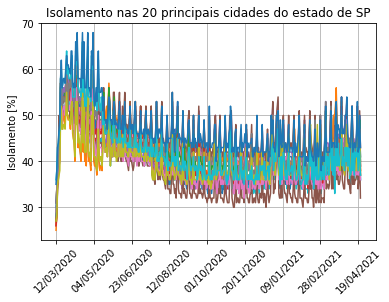

In [20]:
# Get only the cities with more relevant sample of population
N = 21
population.sort_values(ascending=False, inplace=True)

most_pop_cities = population.head(N).index.values

most_pop_cities_population = population.head(N).values

img =df_t[most_pop_cities].plot(
    grid=True, legend=False, ylabel='Isolamento [%]',
    title=f'Isolamento nas {N-1} principais cidades do estado de SP')
plt.xticks(rotation=45)

In [21]:
df_t[most_pop_cities].corr()

Município,ESTADO DE SÃO PAULO,SÃO PAULO,GUARULHOS,CAMPINAS,SÃO BERNARDO DO CAMPO,SÃO JOSÉ DOS CAMPOS,SANTO ANDRÉ,RIBEIRÃO PRETO,OSASCO,SOROCABA,MAUÁ,SÃO JOSÉ DO RIO PRETO,MOGI DAS CRUZES,SANTOS,DIADEMA,JUNDIAÍ,PIRACICABA,CARAPICUÍBA,BAURU,ITAQUAQUECETUBA,SÃO VICENTE
Município,,,,,,,,,,,,,,,,,,,,,
ESTADO DE SÃO PAULO,1.000000,0.980780,0.949624,0.963813,0.959979,0.971337,0.986729,0.881621,0.953150,0.974296,0.913304,0.906689,0.961759,0.974417,0.894632,0.968291,0.969615,0.921568,0.932100,0.885376,0.925897
SÃO PAULO,0.980780,1.000000,0.930798,0.953676,0.933363,0.953154,0.974129,0.861411,0.941212,0.945250,0.873201,0.877347,0.943208,0.956810,0.839433,0.948916,0.938457,0.883856,0.893611,0.861967,0.904543
GUARULHOS,0.949624,0.930798,1.000000,0.952728,0.886014,0.906101,0.948802,0.735094,0.991432,0.972109,0.968649,0.793217,0.972684,0.962115,0.942194,0.979444,0.951143,0.973416,0.847042,0.971139,0.949620
CAMPINAS,0.963813,0.953676,0.952728,1.000000,0.880890,0.930003,0.948555,0.840222,0.955970,0.961500,0.900122,0.870351,0.938187,0.973289,0.879347,0.970798,0.946532,0.911998,0.885462,0.892249,0.878609
SÃO BERNARDO DO CAMPO,0.959979,0.933363,0.886014,0.880890,1.000000,0.942163,0.967693,0.858999,0.893583,0.935084,0.885473,0.897743,0.930157,0.925126,0.874308,0.911799,0.943271,0.878226,0.917924,0.832876,0.913649
SÃO JOSÉ DOS CAMPOS,0.971337,0.953154,0.906101,0.930003,0.942163,1.000000,0.958511,0.905138,0.905786,0.943675,0.863953,0.921942,0.923861,0.941708,0.852887,0.936053,0.948998,0.871498,0.933995,0.833599,0.893363
SANTO ANDRÉ,0.986729,0.974129,0.948802,0.948555,0.967693,0.958511,1.000000,0.847517,0.956894,0.972892,0.926497,0.886022,0.969177,0.970845,0.905572,0.966084,0.971688,0.926204,0.913091,0.898105,0.939173
RIBEIRÃO PRETO,0.881621,0.861411,0.735094,0.840222,0.858999,0.905138,0.847517,1.000000,0.737631,0.815259,0.674179,0.953818,0.760499,0.823665,0.673803,0.794470,0.829297,0.689404,0.903317,0.616555,0.711862
OSASCO,0.953150,0.941212,0.991432,0.955970,0.893583,0.905786,0.956894,0.737631,1.000000,0.970950,0.964642,0.794820,0.974644,0.965506,0.936342,0.979426,0.951875,0.972537,0.845229,0.966317,0.947660


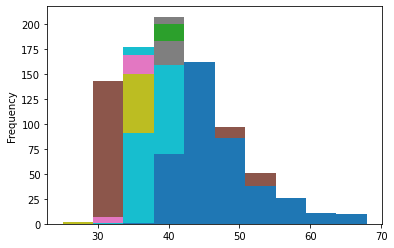

In [22]:
# Evaluating isolation data across 
df_t[most_pop_cities].plot(kind='hist',legend=False)

In [23]:
# add day of week information in the timeseries
df_t.index = pd.to_datetime(df_t.index,format='%d/%m/%Y')

df_t['Dia da Semana'] = df_t.index
df_t['finaldesemana'] = df_t.index

df_t['Dia da Semana'] = df_t['Dia da Semana'].apply(lambda x: x.strftime('%A'))

def is_business_day(x):
    '''
    Check if is a business day or not.
    '''
    return 1 if x.weekday() >=5 else 0

df_t['finaldesemana'] = df_t['finaldesemana'].apply(
    lambda x: is_business_day(x))

df_t.head()

Município,AMERICANA,AMPARO,ANDRADINA,ARAÇATUBA,ARARAQUARA,ARARAS,ARTUR NOGUEIRA,ARUJÁ,ASSIS,ATIBAIA,AVARÉ,BARRETOS,BARUERI,BATATAIS,BAURU,BEBEDOURO,BERTIOGA,BIRIGUI,BOITUVA,BOTUCATU,BRAGANÇA PAULISTA,CAÇAPAVA,CAIEIRAS,CAJAMAR,CAMPINAS,CAMPO LIMPO PAULISTA,CAMPOS DO JORDÃO,CAPIVARI,CARAGUATATUBA,CARAPICUÍBA,CATANDUVA,COSMÓPOLIS,COTIA,CRUZEIRO,CUBATÃO,DIADEMA,EMBU DAS ARTES,EMBU-GUAÇU,ESTADO DE SÃO PAULO,FERNANDÓPOLIS,...,RIBEIRÃO PIRES,RIBEIRÃO PRETO,RIO CLARO,RIO GRANDE DA SERRA,SALTO,SANTA BÁRBARA D'OESTE,SANTA ISABEL,SANTANA DE PARNAÍBA,SANTO ANDRÉ,SANTOS,SÃO BERNARDO DO CAMPO,SÃO CAETANO DO SUL,SÃO CARLOS,SÃO JOÃO DA BOA VISTA,SÃO JOAQUIM DA BARRA,SÃO JOSÉ DO RIO PARDO,SÃO JOSÉ DO RIO PRETO,SÃO JOSÉ DOS CAMPOS,SÃO PAULO,SÃO ROQUE,SÃO SEBASTIÃO,SÃO VICENTE,SERTÃOZINHO,SOROCABA,SUMARÉ,SUZANO,TABOÃO DA SERRA,TAQUARITINGA,TATUÍ,TAUBATÉ,TUPÃ,UBATUBA,VALINHOS,VARGEM GRANDE PAULISTA,VÁRZEA PAULISTA,VINHEDO,VOTORANTIM,VOTUPORANGA,Dia da Semana,finaldesemana
2020-03-12,31.0,38.0,38.0,29.0,28.0,34.0,41.0,31.0,31.0,33.0,34.0,36.0,25.0,46.0,27.0,41.0,39.0,37.0,40.0,31.0,29.0,41.0,31.0,38.0,27.0,34.0,37.0,44.0,38.0,28.0,29.0,41.0,33.0,45.0,29.0,31.0,32.0,38.0,28.0,34.0,...,36.0,26.0,33.0,41.0,33.0,30.0,34.0,32.0,26.0,26.0,27.0,26.0,31.0,37.0,50.0,44.0,26.0,31.0,25.0,36.0,44.0,35.0,35.0,28.0,30.0,34.0,28.0,47.0,34.0,33.0,35.0,45.0,29.0,36.0,30.0,34.0,32.0,41.0,Thursday,0
2020-03-13,34.0,40.0,38.0,31.0,30.0,36.0,40.0,35.0,34.0,35.0,37.0,39.0,28.0,43.0,28.0,47.0,36.0,39.0,37.0,34.0,31.0,43.0,33.0,41.0,30.0,36.0,36.0,41.0,41.0,31.0,32.0,40.0,36.0,49.0,33.0,34.0,35.0,33.0,30.0,33.5,...,38.0,28.0,36.0,39.0,35.0,32.0,32.0,34.0,29.0,29.0,30.0,28.0,34.0,40.0,46.0,44.0,28.0,34.0,29.0,37.0,47.0,38.0,40.0,30.0,33.0,36.0,31.0,42.0,36.0,36.0,34.0,47.0,32.0,33.0,33.0,36.0,34.0,45.0,Friday,0
2020-03-17,39.0,45.0,43.0,36.0,35.0,42.0,44.0,40.0,40.0,41.0,42.0,44.0,34.0,45.0,35.0,51.0,46.0,43.0,41.0,39.0,38.0,48.0,40.0,45.0,38.0,41.0,43.0,45.0,48.0,37.0,37.0,43.0,42.0,54.0,37.0,39.0,41.0,40.0,38.0,33.0,...,46.0,34.0,40.0,45.0,39.0,36.0,39.0,41.0,37.0,37.0,37.0,38.0,41.0,47.0,47.0,47.0,35.0,40.0,38.0,43.0,55.0,43.0,44.0,36.0,37.0,42.0,38.0,47.0,41.0,43.0,41.0,54.0,40.0,40.0,37.0,43.0,41.0,48.0,Tuesday,0
2020-03-18,41.0,46.0,42.0,37.0,37.0,42.0,44.0,41.0,42.0,42.0,43.0,44.0,37.0,46.0,36.0,52.0,46.0,44.0,42.0,41.0,39.0,49.0,42.0,45.0,40.0,42.0,43.0,46.0,49.0,39.0,38.0,42.0,44.0,55.0,39.0,41.0,42.0,40.0,40.0,33.0,...,45.0,36.0,41.0,44.0,40.0,38.0,39.0,43.0,39.0,39.0,40.0,40.0,43.0,48.0,48.0,48.0,35.0,41.0,40.0,45.0,57.0,44.0,45.0,37.0,37.0,43.0,40.0,47.0,43.0,43.0,38.0,55.0,42.0,42.0,38.0,45.0,41.0,48.0,Wednesday,0
2020-03-19,42.0,47.0,44.0,38.0,38.0,43.0,45.0,43.0,44.0,43.0,45.0,44.0,38.0,45.0,37.0,54.0,48.0,45.0,43.0,43.0,41.0,52.0,43.0,47.0,43.0,44.0,45.0,46.0,51.0,42.0,39.0,44.0,46.0,56.0,40.0,43.0,44.0,42.0,42.0,34.0,...,53.0,39.0,42.0,47.0,41.0,39.0,41.0,47.0,43.0,42.0,42.0,43.0,45.0,50.0,48.0,49.0,45.0,50.0,43.0,45.0,60.0,47.0,47.0,40.0,40.0,45.0,43.0,48.0,45.0,46.0,40.0,58.0,45.0,44.0,40.0,47.0,45.0,53.0,Thursday,0


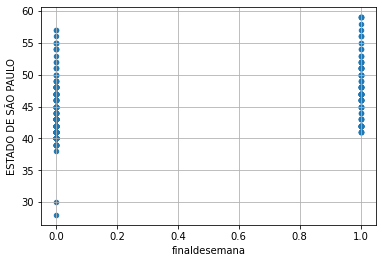

In [24]:
df_t[most_pop_cities.tolist() + ['finaldesemana']].plot(
    kind='scatter',
    x='finaldesemana',
    y='ESTADO DE SÃO PAULO',
    grid=True
)